<a href="https://colab.research.google.com/github/RizqullahRamadhan27/Project-Portofolio-Data/blob/main/Stroke_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stroke

Menurut Organisasi Kesehatan Dunia (WHO) stroke adalah penyebab kematian ke-2 secara global, bertanggung jawab atas sekitar 11% dari total kematian.
Dataset ini digunakan untuk memprediksi kemungkinan seorang pasien terkena stroke berdasarkan parameter input seperti jenis kelamin, usia, berbagai penyakit, dan status merokok. Setiap baris dalam data memberikan informasi yang relevan tentang pasien.

Attribute Information

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has 

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### Menelaah Data

terdiri dari :
- Load Library yang diperlukan.
- Load Dataset.
- Memberi nama header atribut atau fitur (jika belum ada).
- Menganalisa tipe dan relasi data (melihat tipe dataset, ukuran dataset, distribusi class, deskripsi dataset).
- Memberikan laporan atau kesimpulan dari kegiatan menelaah data.
    

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report, accuracy_score, \
                            recall_score, precision_score, f1_score
# Import neccesaries packages & modules

import math
from collections import Counter, defaultdict
from functools import partial
from pprint import pprint

import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.style.use("fivethirtyeight")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_stroke= pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df_stroke.shape

(5110, 12)

In [ ]:
df_stroke.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [ ]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Melihat deskripsi dataset
df_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


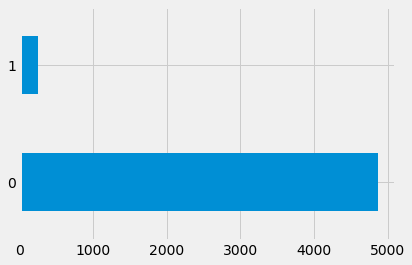

In [ ]:
df_stroke['stroke'].value_counts().plot(kind ='barh')

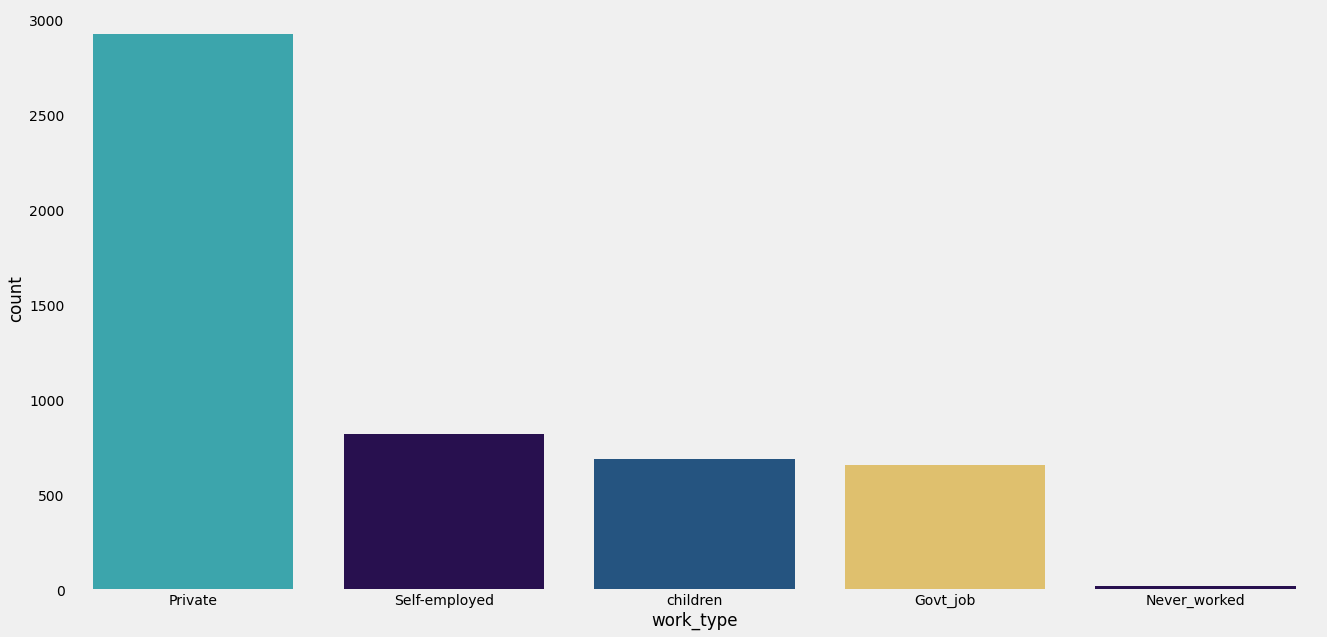

In [ ]:
work_type = df_stroke.work_type.value_counts().index

plt.figure(figsize=(20, 10))
sns.countplot(
    x="work_type",
    data=df_stroke,
    order= work_type,
    palette=["#29B5BF"] + (len(work_type)-1)*["#260659", "#16558F", "#F2C85B"]
)
plt.grid(False)
plt.show()

In [ ]:
def plot_count(data, x=None, y=None, palette=None, figsize=(12, 6), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)


MAIN_COLOR = ["#260659"]    # warna utama untuk visualisasi
OTHER_COLOR = ["#260659"]

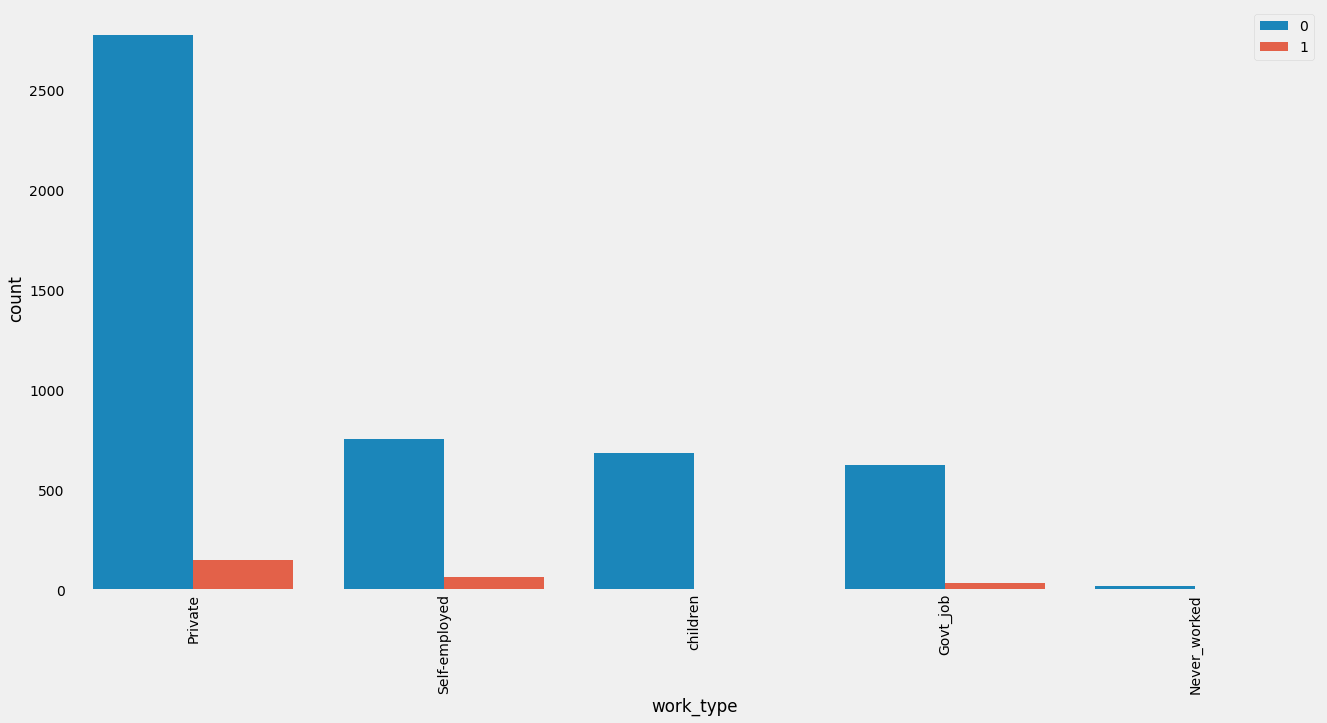

In [ ]:
plot_count(x="work_type", hue="stroke",data=df_stroke, figsize=(20, 10))
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Melihat distribusi Class (apa saja jenisnya)
df_stroke['stroke'].unique()

array([1, 0])

In [ ]:
# Melihat distribusi stroke (jumlahnya tiap stroke)
df_stroke['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

### Memvalidasi Data



In [ ]:
# Mengecek apakah dataframe ada nilai kosong atau "NaN"
df_stroke.isnull().values.any()

True

In [ ]:
# Melihat lokasi pada kolom dataframe yang kosong atau "NaN" (Missing Value)
df_stroke.loc[:, df_stroke.isnull().any()].columns

Index(['bmi'], dtype='object')

### Membersihkan Data

Strategi pembersihan data :
- Perbaiki nilai yang hilang.
- Hapus data duplikat.
- Cek fitur yang bernilai konstant.

In [ ]:
df_stroke[df_stroke.isna().all(axis=1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
df_stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#df_stroke = df_stroke.dropna()

In [ ]:
median_value = df_stroke['bmi'].median()
df_stroke['bmi']=df_stroke['bmi'].fillna(median_value)

In [ ]:
df_stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df_stroke.drop("id", axis=1, inplace=True)

In [ ]:
numerical_features = df_stroke.select_dtypes(include="number").columns.tolist()
categorical_features = df_stroke.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
pprint(numerical_features)
pprint("------------------------------------------------------------------------")
print("Categorical features:")
pprint(categorical_features, compact=True)

Numerical features:
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
'------------------------------------------------------------------------'
Categorical features:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status',
 'stroke']


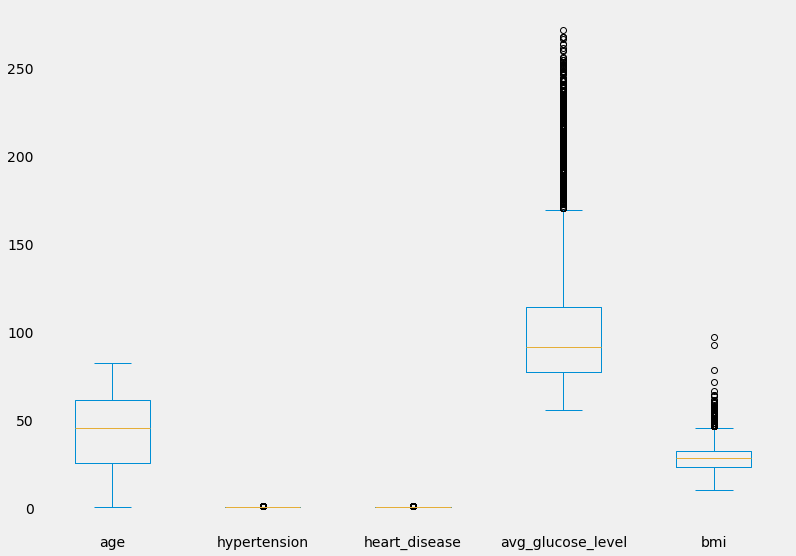

In [ ]:
df_stroke[numerical_features].plot(kind="box", figsize=(12, 9))
plt.grid(False)
plt.show()

In [ ]:
# Handling outlier with IQR
Q1 = (df_stroke[[ 'age', 'avg_glucose_level','bmi','stroke']]).quantile(0.25)
Q3 = (df_stroke[['age', 'avg_glucose_level','bmi','stroke']]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
more_than = (df_stroke > maximum)
lower_than = (df_stroke < minimum)
df_stroke = df_stroke.mask(more_than, maximum, axis=1)
df_stroke = df_stroke.mask(lower_than, minimum, axis=1)
print('\nPersebaran data setelah ditangani Outlier: ')
print(df_stroke[[ 'age', 'hypertension', 'heart_disease','avg_glucose_level','bmi','stroke']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
age                  115.0
avg_glucose_level    169.5
bmi                   45.5
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
age                 -29.0
avg_glucose_level    21.5
bmi                   9.5
dtype: float64

Persebaran data setelah ditangani Outlier: 
               age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.215264      0.097456       0.054012         100.588063   
std      22.633866      0.296607       0.226063          33.377748   
min       0.000000      0.000000       0.000000          55.000000   
25%      25.000000      0.000000       0.000000          77.000000   
50%      45.000000      0.000000       0.000000          91.000000   
75%      61.000000      0.000000       0.000000         114.000000   
max      82.000000      1.000000       1.000000         169.500000   

               bmi  
count  5110

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if sys.path[0] == '':


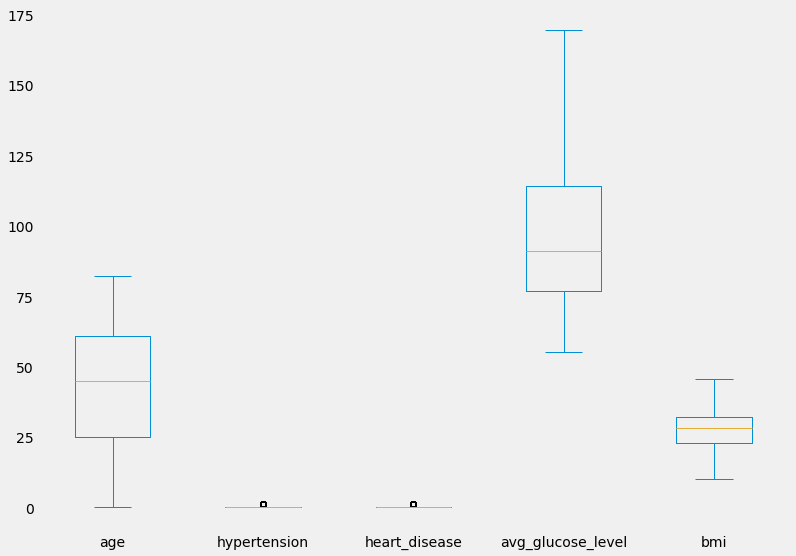

In [ ]:
df_stroke[numerical_features].plot(kind="box", figsize=(12, 9))
plt.grid(False)
plt.show()

### Mengkonstruksi Data
terdiri dari :
- Representasi fitur dan merubah tipenya.
- Membagi data menjadi training dan testing.

In [ ]:
def stroke(x):
  if x == 1  :
    return 'Yes'
  elif x == 0:
    return 'No'
df_stroke['stroke'] = df_stroke['stroke'].apply(stroke)

In [ ]:
df_stroke['age'] = df_stroke['age'].apply(int)
df_stroke['avg_glucose_level'] = df_stroke['avg_glucose_level'].apply(int)
df_stroke['bmi'] = df_stroke['bmi'].apply(int)

In [ ]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5110 non-null   int64 
 1   gender             5110 non-null   object
 2   age                5110 non-null   int64 
 3   hypertension       5110 non-null   int64 
 4   heart_disease      5110 non-null   int64 
 5   ever_married       5110 non-null   object
 6   work_type          5110 non-null   object
 7   Residence_type     5110 non-null   object
 8   avg_glucose_level  5110 non-null   int64 
 9   bmi                5110 non-null   int64 
 10  smoking_status     5110 non-null   object
 11  stroke             5110 non-null   object
dtypes: int64(6), object(6)
memory usage: 479.2+ KB


In [ ]:
df_stroke.shape

(5110, 11)

In [ ]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 439.3+ KB


In [ ]:
def gender(x):
  if x == 'Male':
    return 0
  elif x == 'Female':
    return 1
df_stroke['gender'] = df_stroke['gender'].apply(gender)
def ever_married(x):
  if x == 'Yes':
    return 0
  elif x == 'No':
    return 1
df_stroke['ever_married'] = df_stroke['ever_married'].apply(ever_married)
def work_type(x):
  if x == 'Never_worked':
    return 0
  elif x == 'Govt_job':
    return 1
  elif x == 'children':
    return 2
  elif x == 'Self-employed':
    return 3
  elif x == 'Private':
    return 4
df_stroke['work_type'] = df_stroke['work_type'].apply(work_type)
def Residence_type(x):
  if x == 'Rural':
    return 0
  elif x == 'Urban':
    return 1
df_stroke['Residence_type'] = df_stroke['Residence_type'].apply(Residence_type)
def smoking_status(x):
  if x == 'smokes':
    return 0
  elif x == 'formerly smoked':
    return 1
  elif x == 'Unknown':
    return 2
  elif x == 'never smoked':
    return 3
df_stroke['smoking_status'] = df_stroke['smoking_status'].apply(smoking_status)
def age(x):
  if 0 <= x <= 25 :
    return 0
  elif 26 <= x <= 50:
    return 1
  elif 51 <= x <= 75:
    return 2
  else:
    return 3
df_stroke['age'] = df_stroke['age'].apply(age)
def avg_glucose_level(x):
  if 0 <= x <= 50 :
    return 0
  elif 51 <= x <= 100:
    return 1
  elif 101 <= x <= 151:
    return 2
  else:
    return 3
df_stroke['avg_glucose_level'] = df_stroke['avg_glucose_level'].apply(avg_glucose_level)

In [ ]:
#df_stroke = df_stroke.dropna()

In [ ]:
median_value = df_stroke['gender'].median()
df_stroke['gender']=df_stroke['gender'].fillna(median_value)

In [ ]:
df_stroke['gender'] = df_stroke['gender'].apply(int)
df_stroke['bmi'] = df_stroke['bmi'].apply(int)

In [ ]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             5110 non-null   int64 
 1   age                5110 non-null   int64 
 2   hypertension       5110 non-null   int64 
 3   heart_disease      5110 non-null   int64 
 4   ever_married       5110 non-null   int64 
 5   work_type          5110 non-null   int64 
 6   Residence_type     5110 non-null   int64 
 7   avg_glucose_level  5110 non-null   int64 
 8   bmi                5110 non-null   int64 
 9   smoking_status     5110 non-null   int64 
 10  stroke             5110 non-null   object
dtypes: int64(10), object(1)
memory usage: 439.3+ KB


In [ ]:
df_stroke.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,2,0,1,0,4,1,3,36,1,Yes
1,1,2,0,0,0,3,0,3,28,3,Yes
2,0,3,0,1,0,4,0,2,32,3,Yes
3,1,1,0,0,0,4,1,3,34,0,Yes
4,1,3,1,0,0,3,0,3,24,3,Yes
5,0,3,0,0,0,4,1,3,29,1,Yes
6,0,2,1,1,0,4,0,1,27,3,Yes
7,1,2,0,0,1,4,1,1,22,3,Yes
8,1,2,0,0,0,4,0,1,28,2,Yes
9,1,3,0,0,0,4,1,1,24,2,Yes


In [ ]:
P = pd.DataFrame(df_stroke)
P.to_csv("/content/prediction.csv", index=False)

### Menentukan Label Data


In [ ]:
X = df_stroke[[ 'gender','age',  'work_type','Residence_type','smoking_status']].values
X[0:5]

array([[0, 2, 4, 1, 1],
       [1, 2, 3, 0, 3],
       [0, 3, 4, 0, 3],
       [1, 1, 4, 1, 0],
       [1, 3, 3, 0, 3]])

In [ ]:
y = df_stroke["stroke"]
y[0:5]

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: stroke, dtype: object

### Membangun Model
- Teknik Pemodelan yang dipakai:
    - Menggunakan Decision Tree
    - Menggunakan Decision Tree Normalisasi
    - Random Forest


###Decision Tree Normalisasi

In [ ]:
# Normalisasi menggunakan StandardScaler
X_norm = StandardScaler().fit_transform(X)

In [ ]:
# Melihat hasil normalisasi dengan StandardScaler
X_norm

array([[-1.18998977,  0.79608182,  0.74975889,  0.98407974, -0.82882042],
       [ 0.84034336,  0.79608182, -0.15129189, -1.01617781,  1.03734938],
       [-1.18998977,  1.86351245,  0.74975889, -1.01617781,  1.03734938],
       ...,
       [ 0.84034336, -0.2713488 , -0.15129189, -1.01617781,  1.03734938],
       [-1.18998977,  0.79608182,  0.74975889, -1.01617781, -0.82882042],
       [ 0.84034336, -0.2713488 , -1.95339346,  0.98407974,  0.10426448]])

In [ ]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm,y, test_size=0.3, random_state=2022)

In [ ]:
# menyiapkan parameter yang digunakan
parameters_dt = {
                "model__max_depth": np.arange(1,21),
                "model__min_samples_leaf": np.arange(1,101,2),
                "model__min_samples_split": np.arange(2,11),
                "model__criterion": ['gini','entropy'],
                "model__random_state": [2022]
}

In [ ]:
# Pemodelan Decision Tree
from sklearn.pipeline import Pipeline
classifier_dt_pipeline = Pipeline([
                          ('model',DecisionTreeClassifier()),                                                
                          ])

In [ ]:
norm_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
norm_classifier_dt.fit(X_train_norm,Y_train_norm.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

In [ ]:
norm_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=1, random_state=2022))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 1
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 2022


In [ ]:
norm_y_pred_dt_train = norm_classifier_dt.predict(X_train_norm)

norm_accuracy_dt_train = accuracy_score(Y_train_norm,norm_y_pred_dt_train)
print('Akurasi pada training set: ', norm_accuracy_dt_train)

norm_precision_dt_train = precision_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_precision_dt_train)

norm_recall_dt_train = recall_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_recall_dt_train)

norm_y_pred_dt_test = norm_classifier_dt.predict(X_test_norm)

norm_accuracy_dt_test = accuracy_score(Y_test_norm,norm_y_pred_dt_test)
print('Akurasi pada test set: ', norm_accuracy_dt_test)

norm_precision_dt_test = precision_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_precision_dt_test)

norm_recall_dt_test = recall_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_recall_dt_test)

Akurasi pada training set:  0.9488398098965614
Precision pada training set:  0.9488398098965614
Recall pada training set:  0.9488398098965614
Akurasi pada test set:  0.9569471624266145
Precision pada test set:  0.9569471624266145
Recall pada test set:  0.9569471624266145


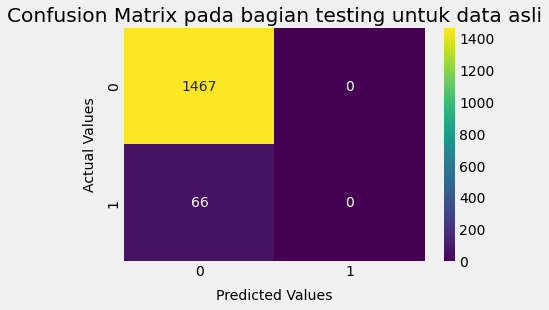

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(Y_test_norm,norm_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Decision Tree Normalisasi Accuracy: ", metrics.accuracy_score(Y_test_norm,norm_y_pred_dt_test))

Decision Tree Normalisasi Accuracy:  0.9569471624266145


###Decision tree

In [ ]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
#The shape of Trainset

print ("Ukuran X_trainset = ", X_trainset.shape)
print ("Ukuran y_trainset = ", y_trainset.shape)


Ukuran X_trainset =  (3577, 5)
Ukuran y_trainset =  (3577,)


In [ ]:
#The shape of Testset

print ("Ukuran X_testset = ", X_testset.shape)
print ("Ukuran y_testset = ", y_testset.shape)

Ukuran X_testset =  (1533, 5)
Ukuran y_testset =  (1533,)


In [ ]:
drugTree = DecisionTreeClassifier(criterion="gini", max_depth = 10)
drugTree # it shows the default parameters

DecisionTreeClassifier(max_depth=10)

In [ ]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(max_depth=10)

In [ ]:
predTree = drugTree.predict(X_testset)

In [ ]:
print (predTree [0:5])
print (y_testset [0:5])


['No' 'No' 'No' 'No' 'No']
2778    No
4029    No
261     No
1868    No
1028    No
Name: stroke, dtype: object


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9556425309849967


In [ ]:
#Use Library: six and sys

import six
import sys


In [ ]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

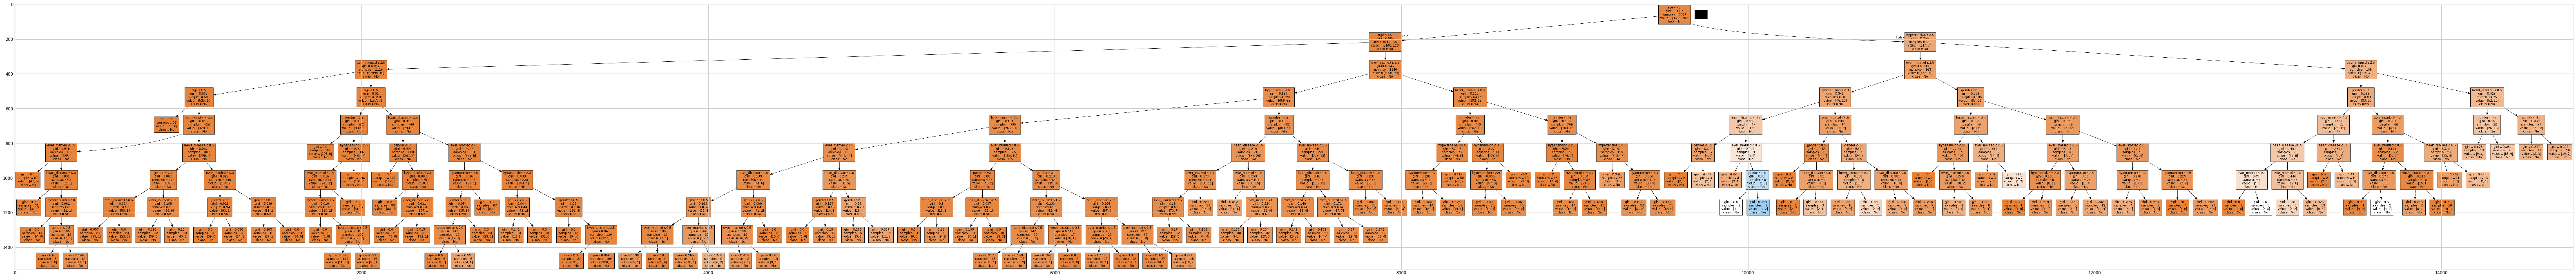

In [ ]:
dot_data = StringIO()
filename = "stroketree.png"
featureNames = df_stroke.columns[0:5]
targetNames = df_stroke["stroke"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 50))
plt.imshow(img,interpolation='nearest')

###Random Forest



In [ ]:
# Import neccesaries packages & modules

import math
from collections import Counter, defaultdict
from functools import partial
from pprint import pprint

import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.style.use("fivethirtyeight")

In [ ]:
df_stroke= pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df_stroke.drop("id", axis=1, inplace=True)

In [ ]:
median_value = df_stroke['bmi'].median()
df_stroke['bmi']=df_stroke['bmi'].fillna(median_value)

In [ ]:
def stroke(x):
  if x == 1  :
    return 'Yes'
  elif x == 0:
    return 'No'
df_stroke['stroke'] = df_stroke['stroke'].apply(stroke)

In [ ]:
df_stroke['age'] = df_stroke['age'].apply(int)
df_stroke['bmi'] = df_stroke['bmi'].apply(int)
df_stroke['avg_glucose_level'] = df_stroke['avg_glucose_level'].apply(int)

In [ ]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             5110 non-null   object
 1   age                5110 non-null   int64 
 2   hypertension       5110 non-null   int64 
 3   heart_disease      5110 non-null   int64 
 4   ever_married       5110 non-null   object
 5   work_type          5110 non-null   object
 6   Residence_type     5110 non-null   object
 7   avg_glucose_level  5110 non-null   int64 
 8   bmi                5110 non-null   int64 
 9   smoking_status     5110 non-null   object
 10  stroke             5110 non-null   object
dtypes: int64(5), object(6)
memory usage: 439.3+ KB


In [ ]:
df_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228,36,formerly smoked,Yes
1,Female,61,0,0,Yes,Self-employed,Rural,202,28,never smoked,Yes
2,Male,80,0,1,Yes,Private,Rural,105,32,never smoked,Yes
3,Female,49,0,0,Yes,Private,Urban,171,34,smokes,Yes
4,Female,79,1,0,Yes,Self-employed,Rural,174,24,never smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83,28,never smoked,No
5106,Female,81,0,0,Yes,Self-employed,Urban,125,40,never smoked,No
5107,Female,35,0,0,Yes,Self-employed,Rural,82,30,never smoked,No
5108,Male,51,0,0,Yes,Private,Rural,166,25,formerly smoked,No


In [ ]:
numerical_features = df_stroke.select_dtypes(include="number").columns.tolist() # memisahkan kolom numerik
categorical_features = df_stroke.select_dtypes(include="object").columns.tolist() # memishakan kolom kategorik

print("Numerical features:")
pprint(numerical_features) # print untuk tipe data yang lebih kompleks (list, tuple, set, dll)
print("Categorical features:")
pprint(categorical_features, compact=True) # agar memastikan categorical_features tidak berubah ketika  dipanggil lagi

Numerical features:
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
Categorical features:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status',
 'stroke']


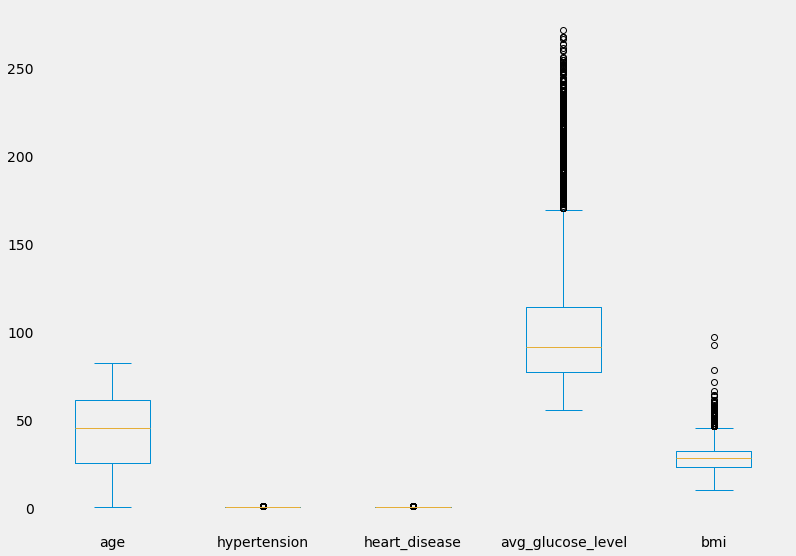

In [ ]:
df_stroke[numerical_features].plot(kind="box", figsize=(12, 9))
plt.grid(False)
plt.show()

In [ ]:
# Handling outlier with IQR
Q1 = (df_stroke[[ 'avg_glucose_level','bmi']]).quantile(0.25)
Q3 = (df_stroke[['avg_glucose_level','bmi']]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
more_than = (df_stroke > maximum)
lower_than = (df_stroke < minimum)
df_stroke = df_stroke.mask(more_than, maximum, axis=1)
df_stroke = df_stroke.mask(lower_than, minimum, axis=1)
print('\nPersebaran data setelah ditangani Outlier: ')
print(df_stroke[[ 'age', 'hypertension', 'heart_disease','avg_glucose_level','bmi']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
avg_glucose_level    169.5
bmi                   45.5
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
avg_glucose_level    21.5
bmi                   9.5
dtype: float64

Persebaran data setelah ditangani Outlier: 
               age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.215264      0.097456       0.054012         100.588063   
std      22.633866      0.296607       0.226063          33.377748   
min       0.000000      0.000000       0.000000          55.000000   
25%      25.000000      0.000000       0.000000          77.000000   
50%      45.000000      0.000000       0.000000          91.000000   
75%      61.000000      0.000000       0.000000         114.000000   
max      82.000000      1.000000       1.000000         169.500000   

               bmi  
count  5110.000000  
mean     28.251566  
std       7.091355  
m

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if sys.path[0] == '':


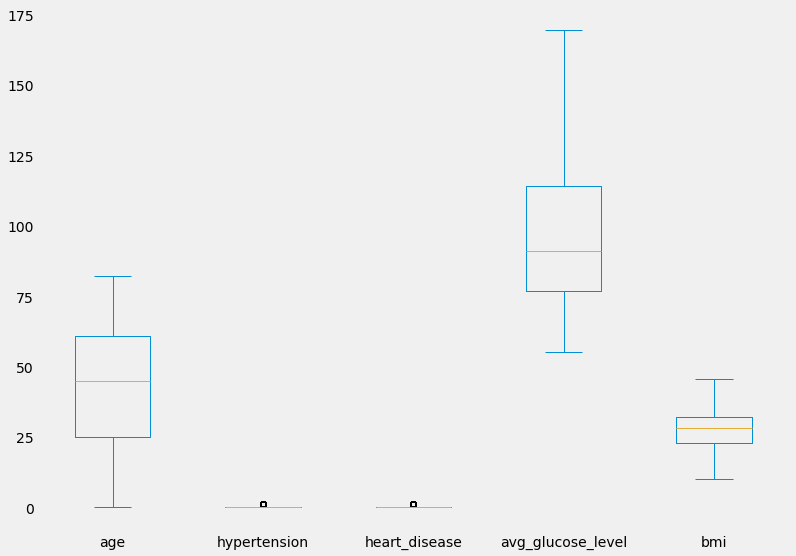

In [ ]:
df_stroke[numerical_features].plot(kind="box", figsize=(12, 9))
plt.grid(False)
plt.show()

In [ ]:
df_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,169.5,36.0,formerly smoked,Yes
1,Female,61,0,0,Yes,Self-employed,Rural,169.5,28.0,never smoked,Yes
2,Male,80,0,1,Yes,Private,Rural,105.0,32.0,never smoked,Yes
3,Female,49,0,0,Yes,Private,Urban,169.5,34.0,smokes,Yes
4,Female,79,1,0,Yes,Self-employed,Rural,169.5,24.0,never smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.0,28.0,never smoked,No
5106,Female,81,0,0,Yes,Self-employed,Urban,125.0,40.0,never smoked,No
5107,Female,35,0,0,Yes,Self-employed,Rural,82.0,30.0,never smoked,No
5108,Male,51,0,0,Yes,Private,Rural,166.0,25.0,formerly smoked,No


In [ ]:
df_stroke['age'] = df_stroke['age'].apply(int)
df_stroke['bmi'] = df_stroke['bmi'].apply(int)
df_stroke['avg_glucose_level'] = df_stroke['avg_glucose_level'].apply(int)

In [ ]:
print('Continuous Columns')
df_stroke.select_dtypes(include=['int']).describe().T[['min', 'mean', 'max']].style.background_gradient(cmap='Blues')

Continuous Columns


,min,mean,max
age,0.000000,43.215264,82.000000
hypertension,0.000000,0.097456,1.000000
heart_disease,0.000000,0.054012,1.000000
avg_glucose_level,55.000000,100.527202,169.000000
bmi,10.000000,28.238552,45.000000


In [ ]:
for col in [ 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']:
    df_stroke[col] = df_stroke[col]/df_stroke[col].max()

In [ ]:
print('\nCategorical Columns\n')
df_stroke.select_dtypes(include=['O']).nunique()


Categorical Columns



gender            3
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
stroke            2
dtype: int64

In [ ]:
# menghitung/counting jumlah persebaran setiap Unique Value didalam setiap variabel
for feature in categorical_features:
    print(df_stroke[feature].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
No     4861
Yes     249
Name: stroke, dtype: int64


In [ ]:
# Integer encode columns with 2 unique values
from sklearn.preprocessing import LabelEncoder
for col in ['ever_married','Residence_type','stroke']:
    if df_stroke[col].dtype == 'O':
        le = LabelEncoder()
        df_stroke[col] = le.fit_transform(df_stroke[col])
# One-hot encode columns with more than 2 unique values
df_stroke = pd.get_dummies(df_stroke, columns=['gender','work_type','smoking_status' ], prefix = ['gender','work_type','smoking_status'])

In [ ]:
features = df_stroke[['age', 'hypertension', 'heart_disease','ever_married','Residence_type','avg_glucose_level','bmi','gender_Female',
                      'gender_Male','gender_Other','work_type_Govt_job','work_type_Never_worked','work_type_Private',	'work_type_Self-employed',
                      'work_type_children','smoking_status_Unknown','smoking_status_formerly smoked',	'smoking_status_never smoked','smoking_status_smokes']]

labels = df_stroke['stroke']

In [ ]:
# Splitting the dataset- 40% for validation, and the rest 60% for training
train_df = df_stroke[:int(len(df_stroke)*0.6)]
val_df = df_stroke[int(len(df_stroke)*0.6):]

In [ ]:
print('\nData in Train:')
print(train_df['stroke'].value_counts())

print('\nData in Val:')
print(val_df['stroke'].value_counts())


Data in Train:
0    2817
1     249
Name: stroke, dtype: int64

Data in Val:
0    2044
Name: stroke, dtype: int64


In [ ]:
x_train = np.array(train_df[['age', 'hypertension', 'heart_disease','ever_married','Residence_type','avg_glucose_level','bmi','gender_Female',
                      'gender_Male','gender_Other','work_type_Govt_job','work_type_Never_worked','work_type_Private',	'work_type_Self-employed',
                      'work_type_children','smoking_status_Unknown','smoking_status_formerly smoked',	'smoking_status_never smoked','smoking_status_smokes']])
y_train = np.array(train_df['stroke'])

x_val = np.array(val_df[['age', 'hypertension', 'heart_disease','ever_married','Residence_type','avg_glucose_level','bmi','gender_Female',
                      'gender_Male','gender_Other','work_type_Govt_job','work_type_Never_worked','work_type_Private',	'work_type_Self-employed',
                      'work_type_children','smoking_status_Unknown','smoking_status_formerly smoked',	'smoking_status_never smoked','smoking_status_smokes']])
y_val = np.array(val_df['stroke'])

In [ ]:
# New Module import = Random Forest & K-Neighbors Classifier
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Random Forest Modelling
rf = RandomForestClassifier().fit(x_train, y_train)

y_pred = rf.predict(x_val)

print(classification_report(y_val,y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2044
           1       0.00      0.00      0.00         0

    accuracy                           0.99      2044
   macro avg       0.50      0.50      0.50      2044
weighted avg       1.00      0.99      1.00      2044



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


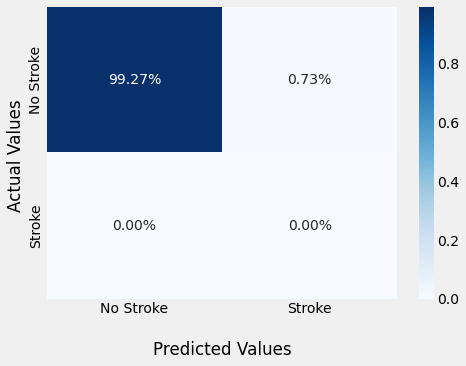

In [ ]:
# Confusion Matrix w/ Random Forest
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No Stroke','Stroke'])
ax.yaxis.set_ticklabels(['No Stroke','Stroke'])

plt.show()

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Random Forest Accuracy: ", metrics.accuracy_score(y_val, y_pred))

Random Forest Accuracy:  0.9926614481409002
